<a href="https://colab.research.google.com/github/oliverwsd/finance/blob/master/time_series_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',6)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',78)
pd.set_option('precision',3) 

In [7]:
start = datetime.date(2018,1,1)
end   = datetime.date.today()
msft  = web.DataReader('MSFT','yahoo',start,end)
msft[:5]

             High    Low   Open  Close     Volume  Adj Close
Date                                                        
2018-01-02  86.31  85.50  86.13  85.95  2.248e+07     83.030
2018-01-03  86.51  85.97  86.06  86.35  2.606e+07     83.416
2018-01-04  87.66  86.57  86.59  87.11  2.191e+07     84.150
2018-01-05  88.41  87.43  87.66  88.19  2.341e+07     85.193
2018-01-08  88.58  87.60  88.20  88.28  2.211e+07     85.280

In [8]:
actions = web.DataReader('MSFT','yahoo-actions',start,end)
actions[:5]

              action  value
2020-02-19  DIVIDEND   0.51
2019-11-20  DIVIDEND   0.51
2019-08-14  DIVIDEND   0.46
2019-05-15  DIVIDEND   0.46
2019-02-20  DIVIDEND   0.46

In [10]:
msft['action'], msft['value'] = actions.action, actions.value
print(msft)

              High     Low    Open  ...  Adj Close  action  value
Date                                ...                          
2018-01-02   86.31   85.50   86.13  ...     83.030     NaN    NaN
2018-01-03   86.51   85.97   86.06  ...     83.416     NaN    NaN
2018-01-04   87.66   86.57   86.59  ...     84.150     NaN    NaN
2018-01-05   88.41   87.43   87.66  ...     85.193     NaN    NaN
2018-01-08   88.58   87.60   88.20  ...     85.280     NaN    NaN
...            ...     ...     ...  ...        ...     ...    ...
2020-04-30  180.40  176.23  180.00  ...    179.210     NaN    NaN
2020-05-01  178.64  174.01  175.80  ...    174.570     NaN    NaN
2020-05-04  179.00  173.80  174.49  ...    178.840     NaN    NaN
2020-05-05  183.65  179.90  180.62  ...    180.760     NaN    NaN
2020-05-06  184.20  181.64  182.08  ...    182.540     NaN    NaN

[590 rows x 8 columns]


In [0]:
def get(tickers, start, end):
  def data(ticker):
    return web.DataReader(ticker, 'yahoo', start, end)
  datas = map(data,tickers) # ticker中每一项调用data() -> [df1, df2, ..]
  return pd.concat(datas, keys= tickers, names=['Ticker','Date']) # 加一个层次key来识别数据来源于哪个df

# get a list of stocks tickers and return all the results in a single DataFrame

In [25]:
tickers = ['AAPL','MSFT','IBM','KO']
all_data = get(tickers,start,end)
all_data #load data for all of our stocks

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2018-01-02  172.30  169.26  170.16  172.26  2.556e+07    166.804
       2018-01-03  174.55  171.96  172.53  172.23  2.952e+07    166.775
       2018-01-04  173.47  172.08  172.54  173.03  2.243e+07    167.550
       2018-01-05  175.37  173.05  173.44  175.00  2.366e+07    169.457
       2018-01-08  175.61  173.93  174.35  174.35  2.057e+07    168.828
...                   ...     ...     ...     ...        ...        ...
KO     2020-04-30   47.00   45.70   47.00   45.89  2.080e+07     45.890
       2020-05-01   46.39   45.21   45.62   45.60  1.429e+07     45.600
       2020-05-04   45.48   44.60   45.32   45.14  2.254e+07     45.140
       2020-05-05   46.10   45.15   45.36   45.40  1.337e+07     45.400
       2020-05-06   45.63   44.72   45.40   44.75  1.181e+07     44.750

[2360 rows x 6 columns]

In [15]:
# fetch index data from Yahoo!
sp_500 = web.DataReader('^GSPC','yahoo',start,end)
sp_500[:5]

               High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2018-01-02  2695.89  2682.36  2683.73  2695.81  3367250000    2695.81
2018-01-03  2714.37  2697.77  2697.85  2713.06  3538660000    2713.06
2018-01-04  2729.29  2719.07  2719.31  2723.99  3695260000    2723.99
2018-01-05  2743.45  2727.92  2731.33  2743.15  3236620000    2743.15
2018-01-08  2748.51  2737.60  2742.67  2747.71  3242650000    2747.71

In [26]:
#Plor closing price
closing_prices = all_data['Adj Close'].reset_index() # move datas into a column 很关键
closing_prices [:5]

  Ticker       Date  Adj Close
0   AAPL 2018-01-02    166.804
1   AAPL 2018-01-03    166.775
2   AAPL 2018-01-04    167.550
3   AAPL 2018-01-05    169.457
4   AAPL 2018-01-08    168.828

In [27]:
daily_close_px = closing_prices.pivot('Date','Ticker','Adj Close') # pivot Date into the index, and each Ticker value into a column
daily_close_px # 数据重组

Ticker         AAPL      IBM      KO     MSFT
Date                                         
2018-01-02  166.804  139.365  42.295   83.030
2018-01-03  166.775  143.196  42.202   83.416
2018-01-04  167.550  146.097  42.796   84.150
2018-01-05  169.457  146.810  42.787   85.193
2018-01-08  168.828  147.696  42.722   85.280
...             ...      ...     ...      ...
2020-04-30  293.800  125.560  45.890  179.210
2020-05-01  289.070  121.870  45.600  174.570
2020-05-04  293.160  121.680  45.140  178.840
2020-05-05  297.560  122.580  45.400  180.760
2020-05-06  300.630  123.170  44.750  182.540

[590 rows x 4 columns]

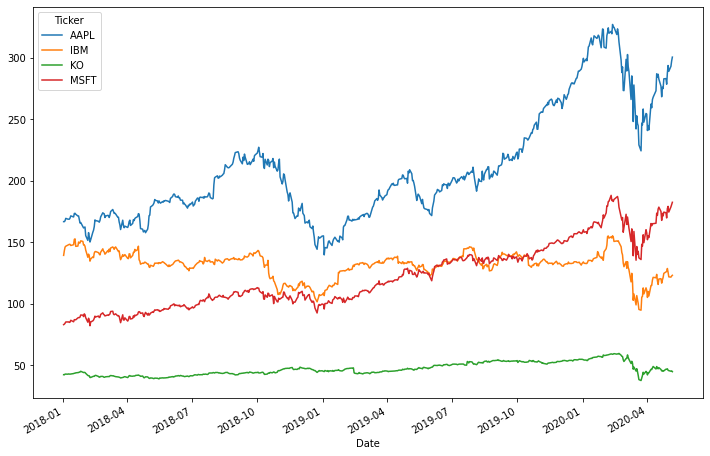

In [28]:
_ = daily_close_px.plot(figsize= (12,8))

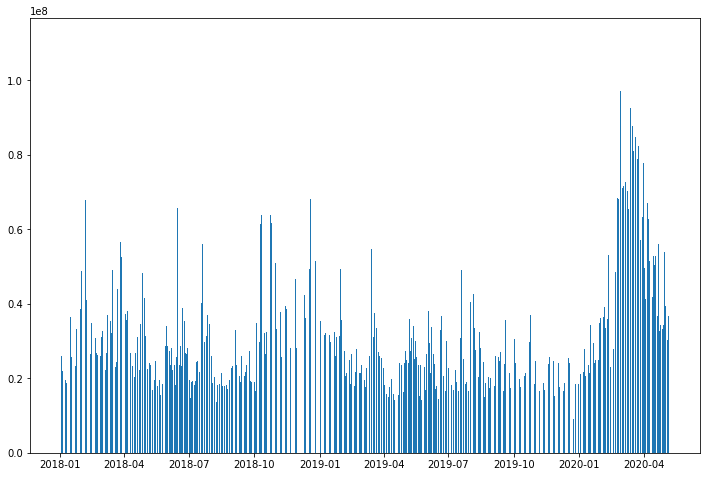

In [31]:
# plot volume-series data 
msftV = all_data.Volume.loc["MSFT"]
plt.bar(msftV.index, msftV) # 柱状图
plt.gcf().set_size_inches(12,8) # get the current figure

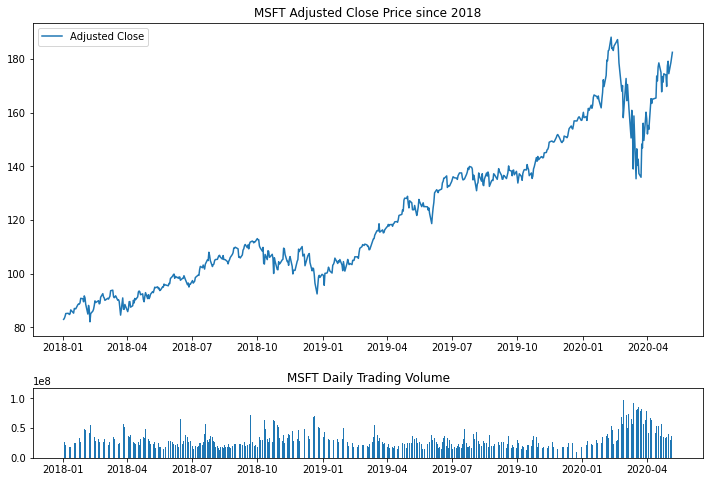

In [34]:
# combined price and volumes
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(daily_close_px.index, daily_close_px['MSFT'], label='Adjusted Close')
plt.title('MSFT Adjusted Close Price since 2018')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('MSFT Daily Trading Volume')

plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [39]:
# Plot Candlesticks
subset = all_data.loc['MSFT'].loc['2020-01':'2020-01'].reset_index()
subset

         Date    High     Low  ...   Close     Volume  Adj Close
0  2020-01-02  160.73  158.33  ...  160.62  2.262e+07    160.182
1  2020-01-03  159.95  158.06  ...  158.62  2.112e+07    158.188
2  2020-01-06  159.10  156.51  ...  159.03  2.081e+07    158.597
3  2020-01-07  159.67  157.32  ...  157.58  2.163e+07    157.151
4  2020-01-08  160.80  157.95  ...  160.09  2.775e+07    159.654
..        ...     ...     ...  ...     ...        ...        ...
16 2020-01-27  163.38  160.20  ...  162.28  3.208e+07    161.838
17 2020-01-28  165.76  163.07  ...  165.46  2.490e+07    165.009
18 2020-01-29  168.75  165.69  ...  168.04  3.475e+07    167.582
19 2020-01-30  174.05  170.79  ...  172.78  5.160e+07    172.309
20 2020-01-31  172.40  169.58  ...  170.23  3.614e+07    169.766

[21 rows x 7 columns]

In [41]:
# convert pandas date to pydatetime, and then use matplotlib.dates.date2num function to convert into 
# the representation needed for the matplotlib label formatter
import matplotlib.dates as mdates
subset['date_num']= subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))
# apply() to convert each vlaue in the Date column to this representation and add it as the new column
subset

         Date    High     Low  ...     Volume  Adj Close  date_num
0  2020-01-02  160.73  158.33  ...  2.262e+07    160.182  737426.0
1  2020-01-03  159.95  158.06  ...  2.112e+07    158.188  737427.0
2  2020-01-06  159.10  156.51  ...  2.081e+07    158.597  737430.0
3  2020-01-07  159.67  157.32  ...  2.163e+07    157.151  737431.0
4  2020-01-08  160.80  157.95  ...  2.775e+07    159.654  737432.0
..        ...     ...     ...  ...        ...        ...       ...
16 2020-01-27  163.38  160.20  ...  3.208e+07    161.838  737451.0
17 2020-01-28  165.76  163.07  ...  2.490e+07    165.009  737452.0
18 2020-01-29  168.75  165.69  ...  3.475e+07    167.582  737453.0
19 2020-01-30  174.05  170.79  ...  5.160e+07    172.309  737454.0
20 2020-01-31  172.40  169.58  ...  3.614e+07    169.766  737455.0

[21 rows x 8 columns]

In [49]:
# Candlestick_ohlc does not know how to work with DataFrame
# convert our data to another format: tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num',
                                              'Open',
                                              'High',
                                              'Low',
                                              'Close']].values]
subset_as_tuples[:5]                                   

[(737426.0,
  158.77999877929688,
  160.72999572753906,
  158.3300018310547,
  160.6199951171875),
 (737427.0,
  158.32000732421875,
  159.9499969482422,
  158.05999755859375,
  158.6199951171875),
 (737430.0,
  157.0800018310547,
  159.10000610351562,
  156.50999450683594,
  159.02999877929688),
 (737431.0,
  159.32000732421875,
  159.6699981689453,
  157.32000732421875,
  157.5800018310547),
 (737432.0,
  158.92999267578125,
  160.8000030517578,
  157.9499969482422,
  160.08999633789062)]